In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
# Loading the Excel file
df_o = pd.read_csv('/content/drive/MyDrive/GoogleColab/data.csv')
schema = pd.read_csv('/content/drive/MyDrive/GoogleColab/schema.csv')
df_o.head()

,Year,CEM,EHP,GFC,LFC,MIC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
0,1990,0.107550,38.966725,65.827743,46.378637,20.227671,6.830123,19.352014,9.294826,14.623468,19203.300,45.524287,3.159834e+10,3.223406e+10,13.239219,-1915.082886,107147651,71.67,18.966502,19.811
1,1991,0.099144,42.790698,83.701053,48.656316,14.046512,8.093023,18.046512,3.148947,17.023256,19203.298,44.671039,3.095748e+10,3.161855e+10,13.987123,-1784.205078,109242834,73.16,18.889827,20.257
2,1992,0.106257,44.293015,81.344112,45.511751,12.691652,8.517888,16.524702,2.730085,17.972743,19203.296,46.728028,3.170887e+10,3.247864e+10,14.397464,-2345.101807,111272102,71.66,19.934006,20.610
3,1993,0.110814,46.277022,82.733588,43.613087,11.689351,7.926341,16.653323,0.962697,17.373899,19203.294,49.456842,3.316652e+10,3.406922e+10,15.412538,-2427.801880,113418757,70.56,23.121583,20.966
4,1994,0.117143,45.285820,84.795990,43.549010,14.105419,7.349666,16.926503,0.731233,16.406830,19203.292,50.251097,3.376866e+10,3.482447e+10,15.869455,-2686.609375,115614891,68.98,22.865865,21.328


In [ ]:
schema

,Short Code,Description
0,CEM,CO2 emissions (metric tons per capita)
1,EHP,CO2 emissions from electricity and heat produc...
2,GFC,CO2 emissions from gaseous fuel consumption (%...
3,LFC,CO2 emissions from liquid fuel consumption (% ...
4,MIC,CO2 emissions from manufacturing industries an...
5,OSE,"CO2 emissions from other sectors, excluding re..."
6,RCP,CO2 emissions from residential buildings and c...
7,SFC,CO2 emissions from solid fuel consumption (% o...
8,TRP,CO2 emissions from transport (% of total fuel ...
9,FTA,Forest area (sq. km)


In [ ]:
df = df_o[df_o['Year'] <= 2021]
df['CEM'] = pd.to_numeric(df['CEM'], errors='coerce')

<ipython-input-5-7959c52142ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CEM'] = pd.to_numeric(df['CEM'], errors='coerce')


In [ ]:
# Assuming your DataFrame has a 'Year' column containing datetime values
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure proper datetime format
df.set_index('Year', inplace=True)

<ipython-input-6-fcc62f2b6c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Ensure proper datetime format


Ploting Trend, Seasonality, Noise of all the Factors


==========================>  CEM  <========================




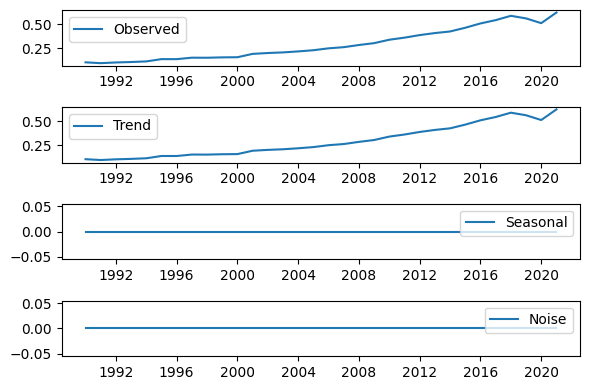



==========================>  EHP  <========================




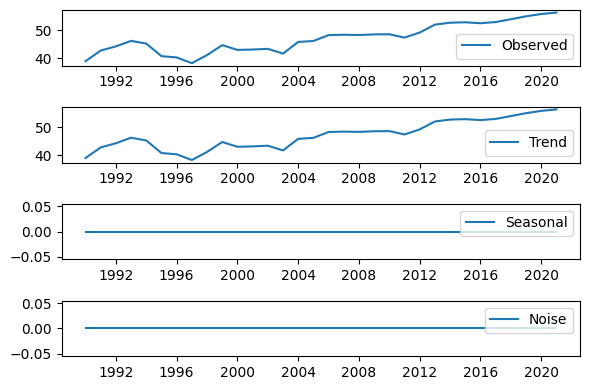



==========================>  GFC  <========================




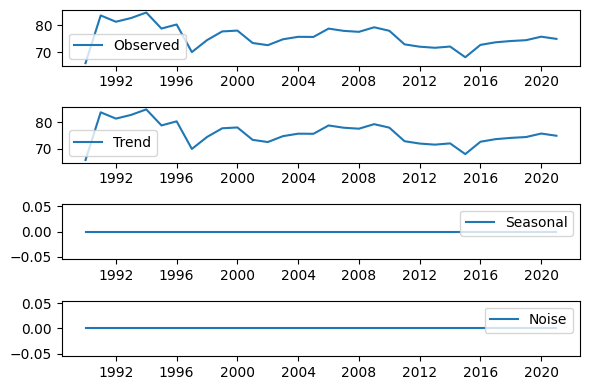



==========================>  LFC  <========================




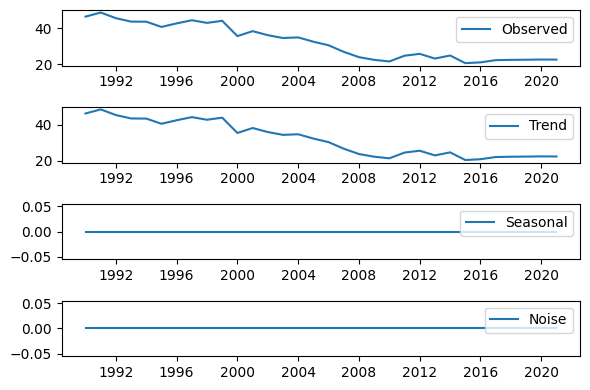



==========================>  MIC  <========================




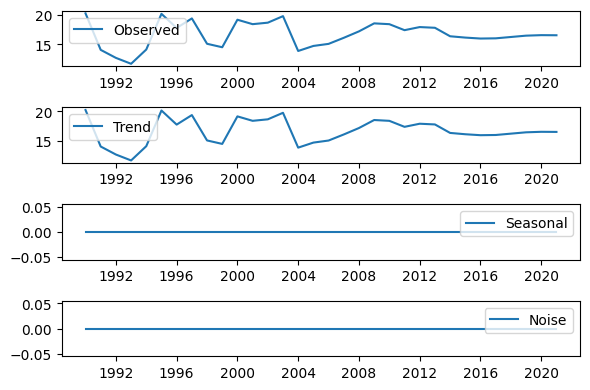



==========================>  OSE  <========================




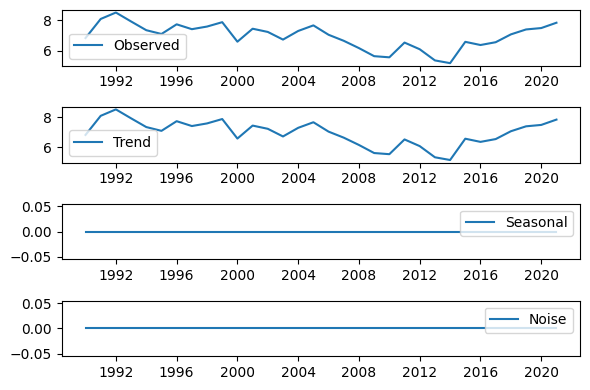



==========================>  RCP  <========================




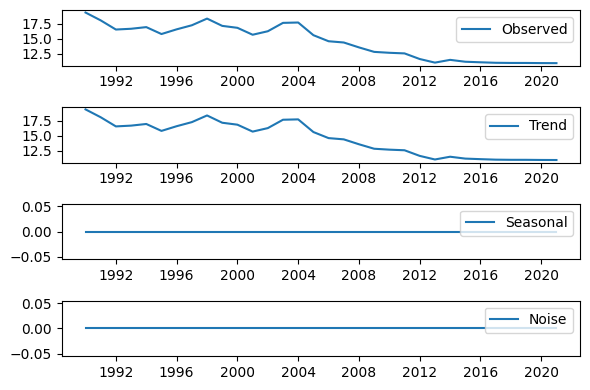



==========================>  SFC  <========================




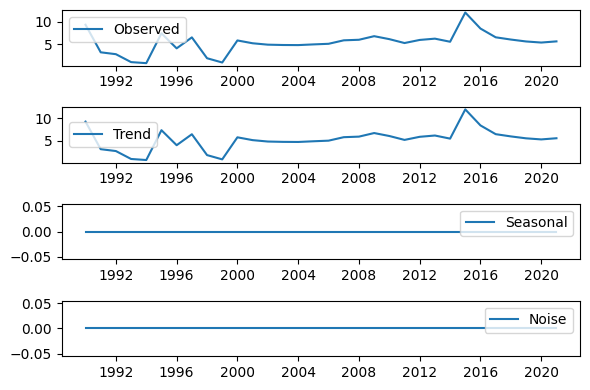



==========================>  TRP  <========================




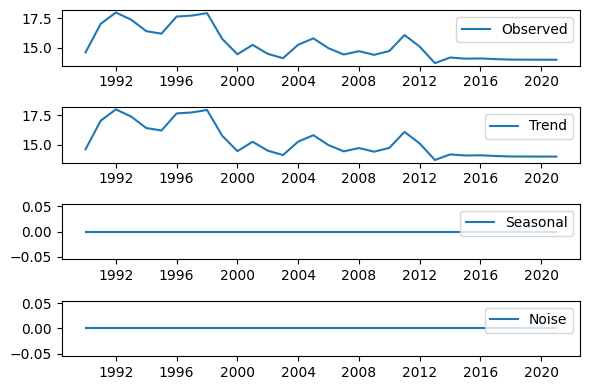



==========================>  FTA  <========================




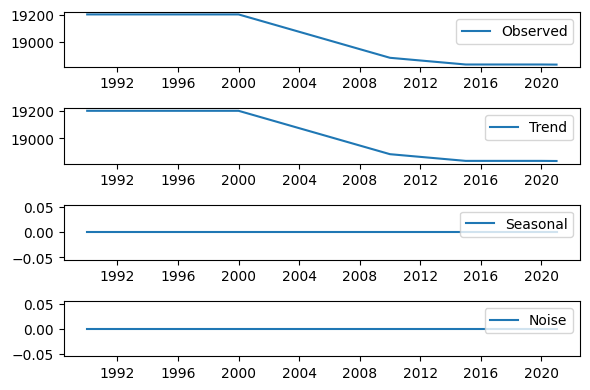



==========================>  FEC  <========================




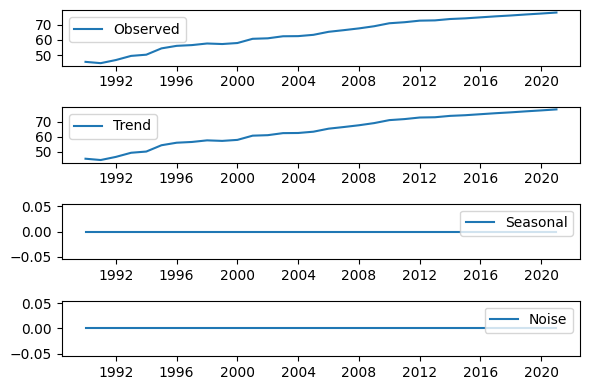



==========================>  GDP  <========================




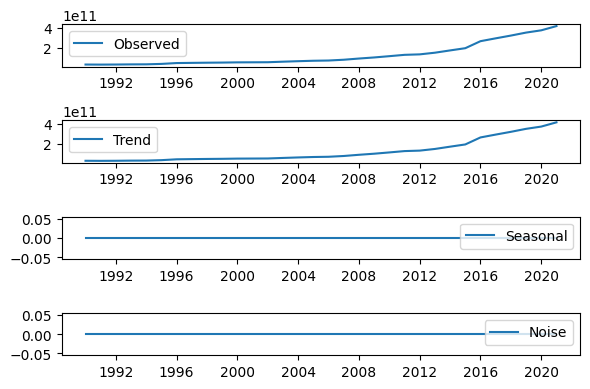



==========================>  GNI  <========================




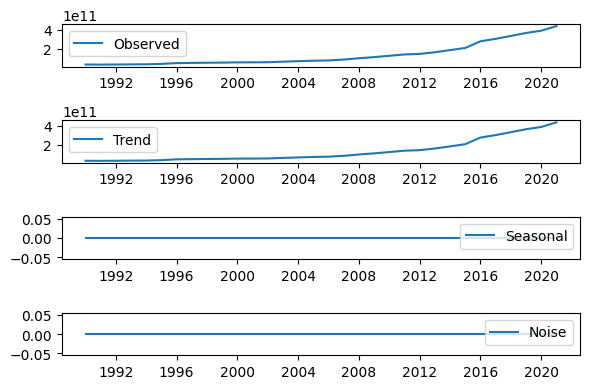



==========================>  MFG  <========================




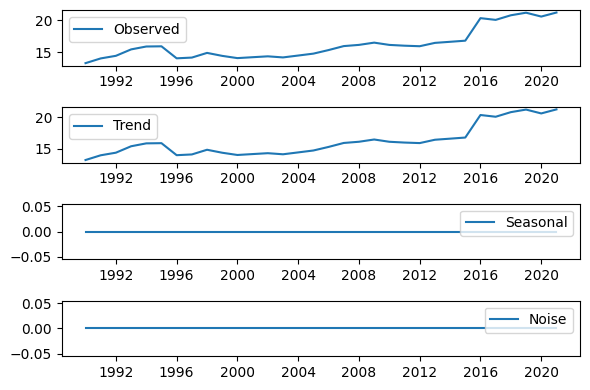



==========================>  GGE  <========================




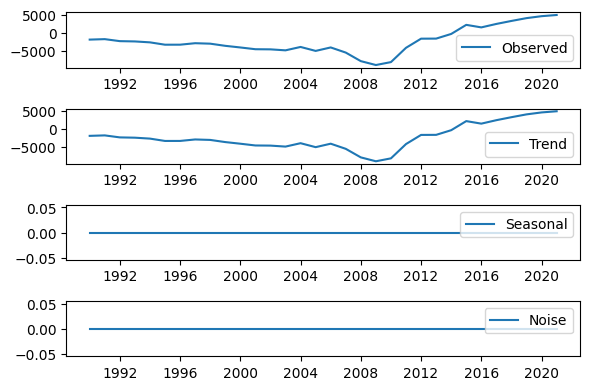



==========================>  PPL  <========================




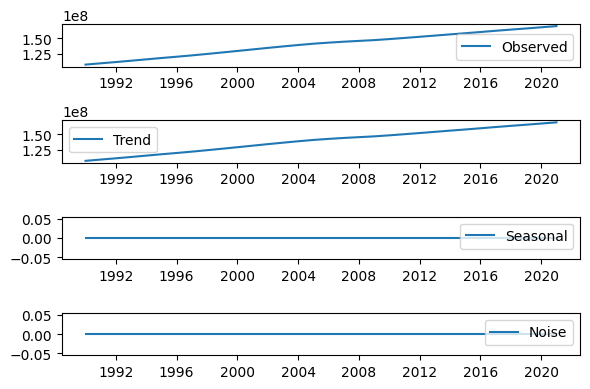



==========================>  REC  <========================




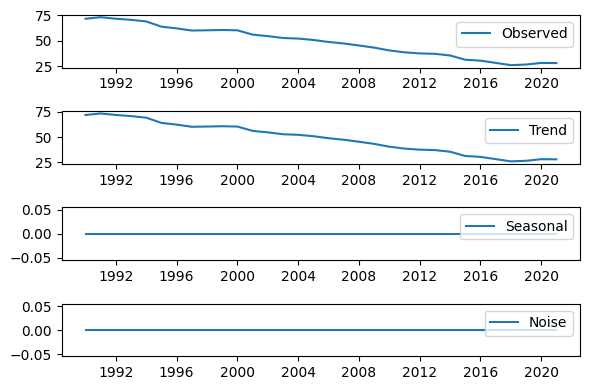



==========================>  TRD  <========================




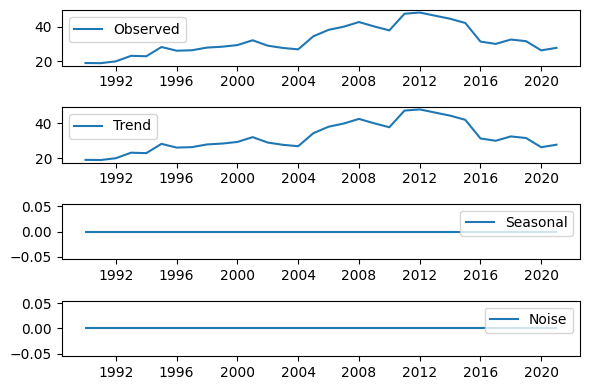



==========================>  UPP  <========================




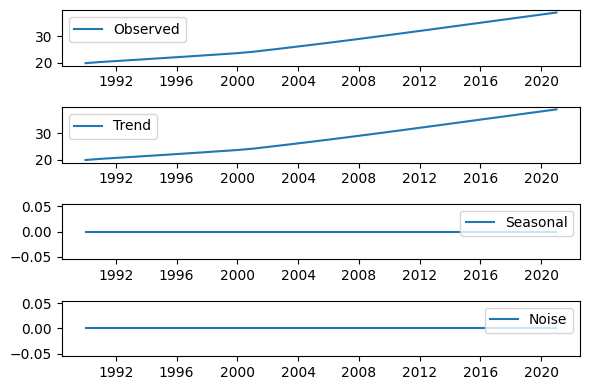

In [ ]:
print("Ploting Trend, Seasonality, Noise of all the Factors")
for items in df.columns:
  res = sm.tsa.seasonal_decompose(df[items], model='additive')

  # Plot the decomposed components

  print(f"\n===============================================================")
  print(f"\n==========================>  {items}  <========================")
  print(f"\n===============================================================\n")
  plt.figure(figsize=(6, 4))
  plt.subplot(411)
  plt.plot(res.observed, label='Observed')
  plt.legend()
  plt.subplot(412)
  plt.plot(res.trend, label='Trend')
  plt.legend()
  plt.subplot(413)
  plt.plot(res.seasonal, label='Seasonal')
  plt.legend()
  plt.subplot(414)
  plt.plot(res.resid, label='Noise')
  plt.legend()
  plt.tight_layout()
  plt.show()

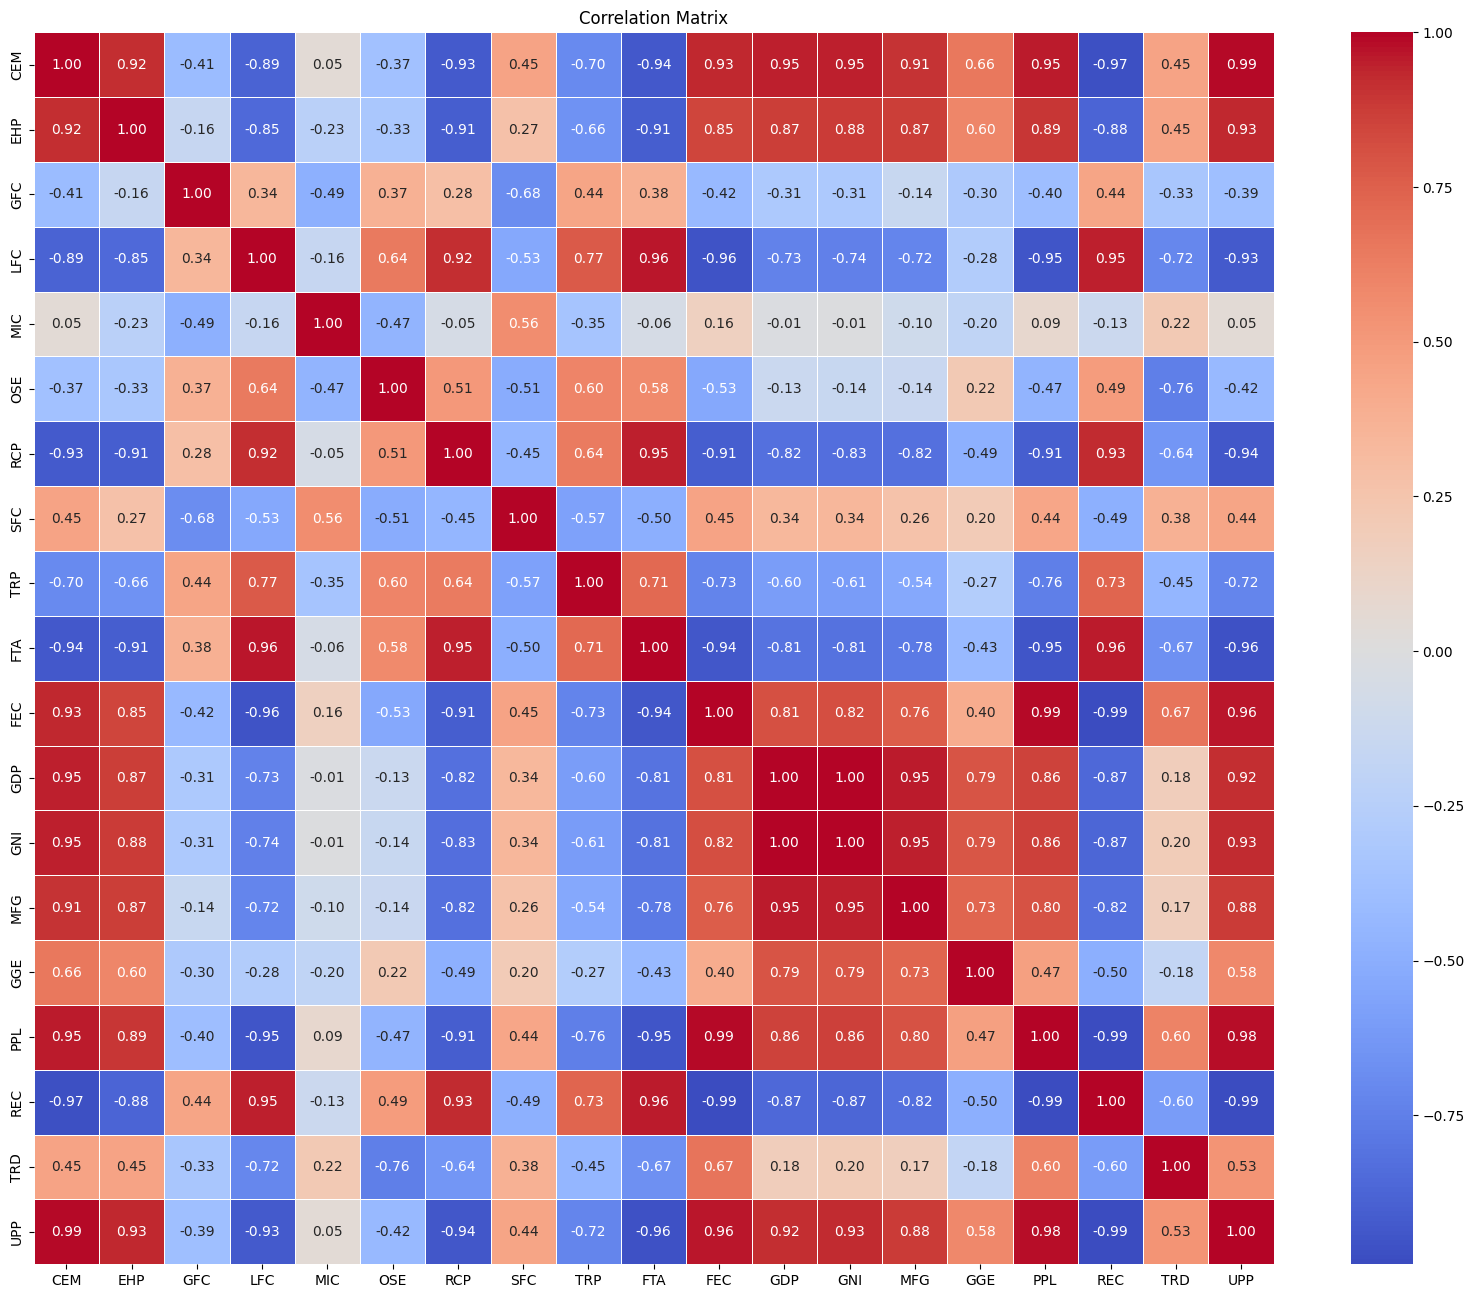

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix['CEM'].sort_values(ascending=False)

,CEM
CEM,1.000000
UPP,0.988085
PPL,0.953652
GNI,0.951027
GDP,0.946872
FEC,0.931908
EHP,0.915998
MFG,0.906281
GGE,0.655926
TRD,0.454383


array([[<Axes: title={'center': 'CEM'}>, <Axes: title={'center': 'EHP'}>,
        <Axes: title={'center': 'GFC'}>, <Axes: title={'center': 'LFC'}>],
       [<Axes: title={'center': 'MIC'}>, <Axes: title={'center': 'OSE'}>,
        <Axes: title={'center': 'RCP'}>, <Axes: title={'center': 'SFC'}>],
       [<Axes: title={'center': 'TRP'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FEC'}>, <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'GNI'}>, <Axes: title={'center': 'MFG'}>,
        <Axes: title={'center': 'GGE'}>, <Axes: title={'center': 'PPL'}>],
       [<Axes: title={'center': 'REC'}>, <Axes: title={'center': 'TRD'}>,
        <Axes: title={'center': 'UPP'}>, <Axes: >]], dtype=object)

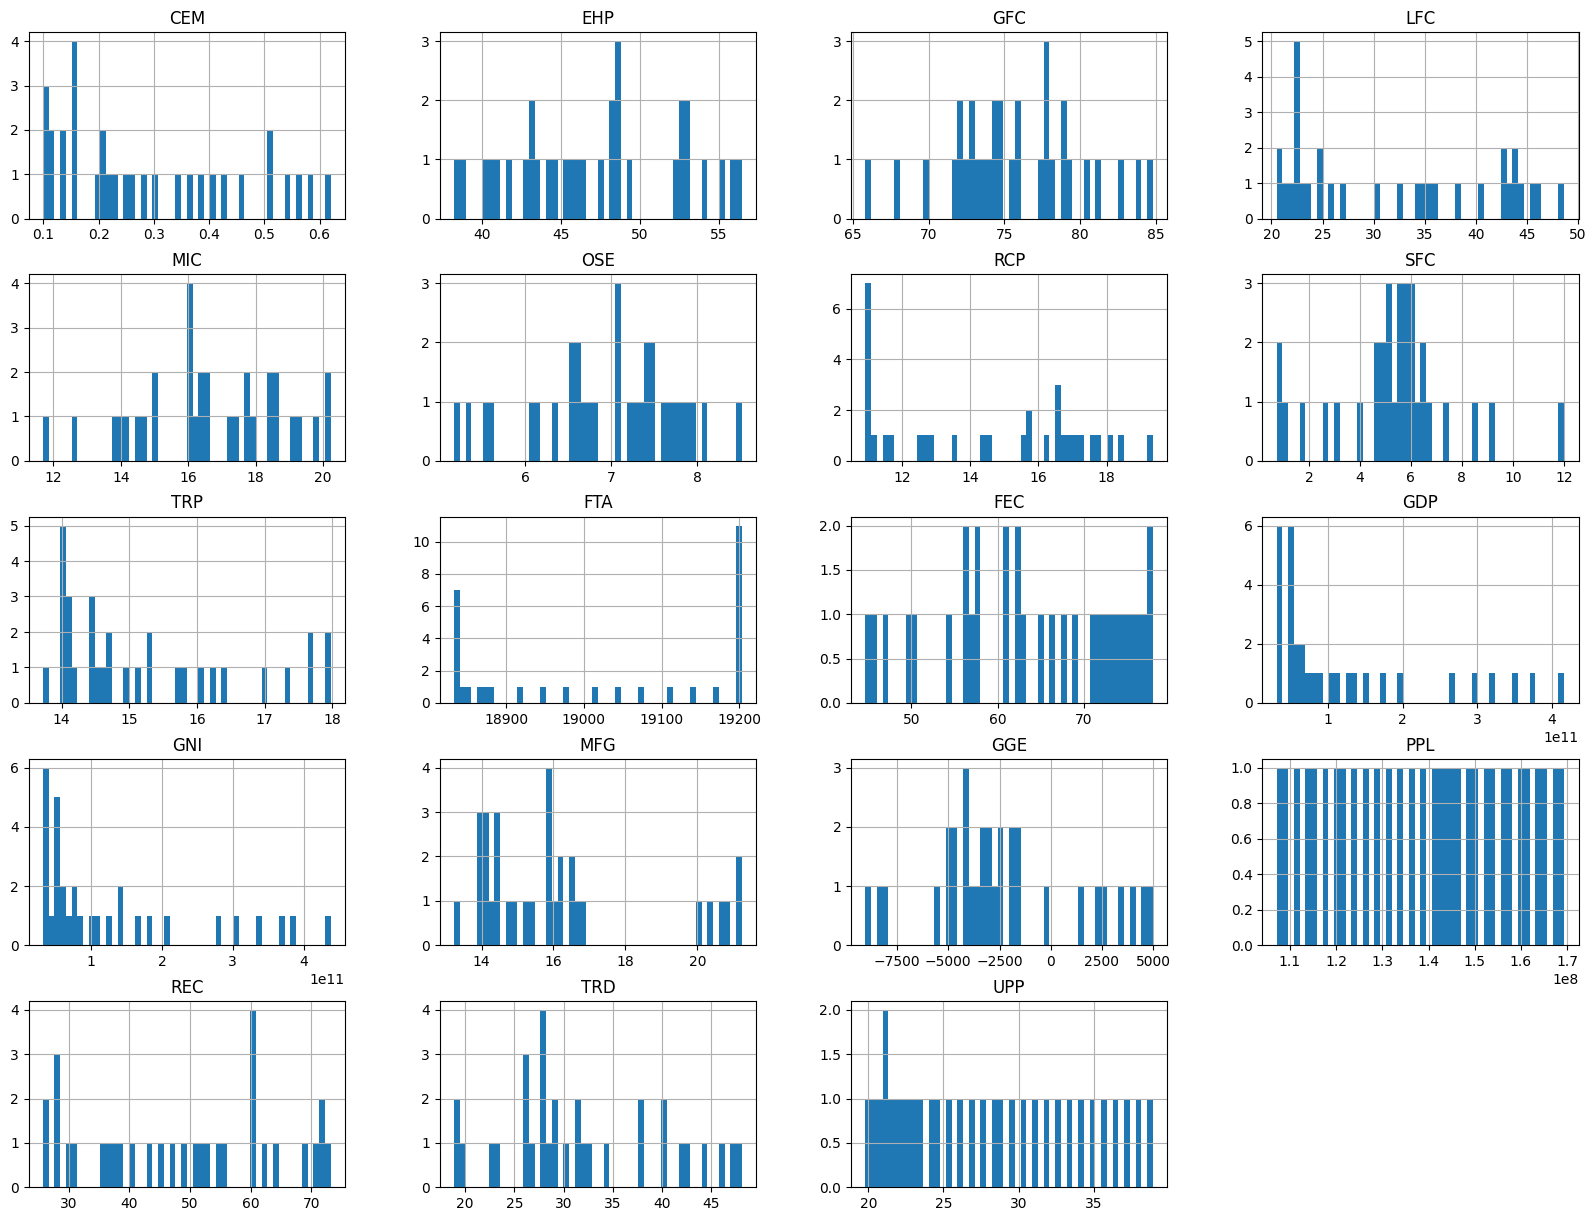

In [ ]:
df.hist(bins=50, figsize=(20,15))

array([[<Axes: xlabel='CEM', ylabel='CEM'>,
        <Axes: xlabel='EHP', ylabel='CEM'>,
        <Axes: xlabel='GFC', ylabel='CEM'>,
        <Axes: xlabel='LFC', ylabel='CEM'>,
        <Axes: xlabel='OSE', ylabel='CEM'>,
        <Axes: xlabel='RCP', ylabel='CEM'>,
        <Axes: xlabel='SFC', ylabel='CEM'>,
        <Axes: xlabel='TRP', ylabel='CEM'>,
        <Axes: xlabel='FTA', ylabel='CEM'>,
        <Axes: xlabel='FEC', ylabel='CEM'>,
        <Axes: xlabel='GDP', ylabel='CEM'>,
        <Axes: xlabel='GNI', ylabel='CEM'>,
        <Axes: xlabel='MFG', ylabel='CEM'>,
        <Axes: xlabel='GGE', ylabel='CEM'>,
        <Axes: xlabel='PPL', ylabel='CEM'>,
        <Axes: xlabel='REC', ylabel='CEM'>,
        <Axes: xlabel='TRD', ylabel='CEM'>,
        <Axes: xlabel='UPP', ylabel='CEM'>],
       [<Axes: xlabel='CEM', ylabel='EHP'>,
        <Axes: xlabel='EHP', ylabel='EHP'>,
        <Axes: xlabel='GFC', ylabel='EHP'>,
        <Axes: xlabel='LFC', ylabel='EHP'>,
        <Axes: xlabel='OSE', yl

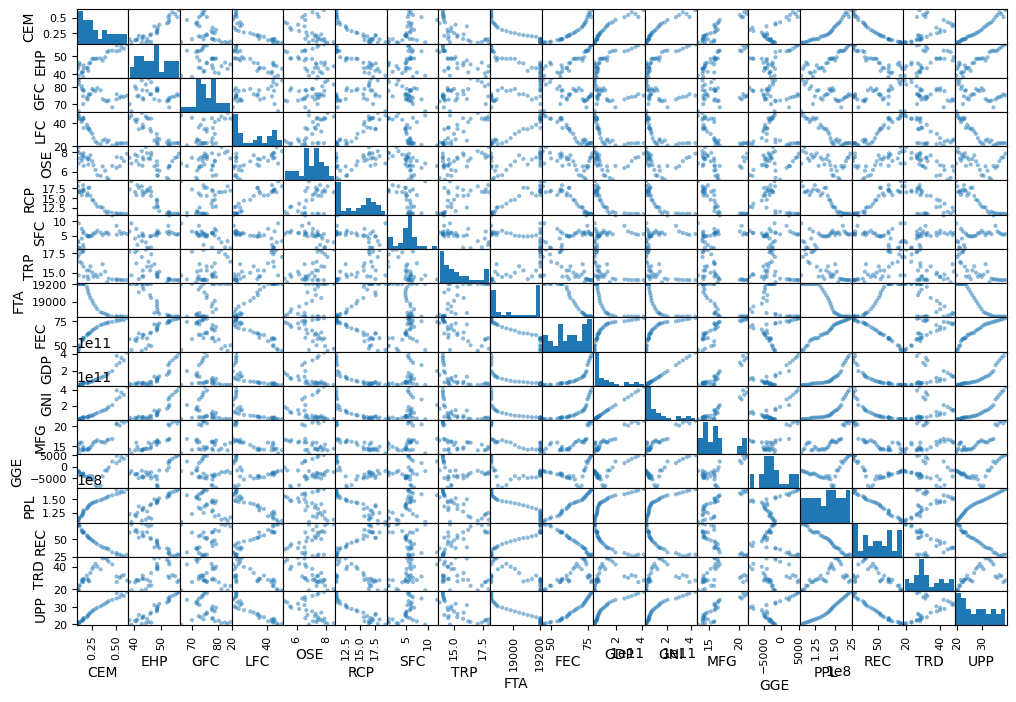

In [ ]:
attributes = ['CEM', 'EHP', 'GFC', 'LFC', 'OSE', 'RCP', 'SFC', 'TRP', 'FTA',
       'FEC', 'GDP', 'GNI', 'MFG', 'GGE', 'PPL', 'REC', 'TRD', 'UPP']

scatter_matrix(df[attributes], figsize=(12,8))

<Axes: xlabel='EHP', ylabel='CEM'>

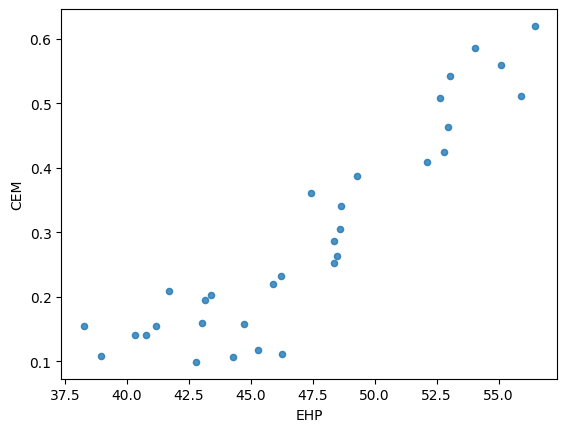

In [ ]:
df.plot(kind='scatter', x='EHP', y='CEM', alpha=0.8)

In [ ]:
df = df.reset_index()
df.tail()

,Year,CEM,EHP,GFC,LFC,MIC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
27,2017-01-01,0.541788,53.034348,73.648323,22.172621,15.998760,6.555589,10.994927,6.493716,14.062901,18834.00000,75.525230,2.937550e+11,3.038970e+11,20.075062,2485.764893,161793964,28.010000,29.999731,35.858
28,2018-01-01,0.586158,54.053688,74.123665,22.341768,16.225594,7.073141,10.968953,5.993553,14.021949,18834.00000,76.095413,3.213790e+11,3.342310e+11,20.802296,3324.412354,163683958,25.790000,32.514632,36.632
29,2019-01-01,0.559734,55.097652,74.438736,22.414127,16.452015,7.399002,10.966677,5.566461,14.019230,18834.00000,76.765594,3.512380e+11,3.656260e+11,21.207945,4111.042480,165516222,26.370000,31.578051,37.405
30,2020-01-01,0.510648,55.923866,75.744476,22.531397,16.537746,7.491343,10.944155,5.323783,14.013135,18834.00000,77.377777,3.739020e+11,3.893790e+11,20.598332,4659.354980,167420951,27.960000,26.271447,38.177
31,2021-01-01,0.620000,56.459362,74.921829,22.469225,16.519894,7.843612,10.934448,5.584586,14.010710,18833.18945,78.038177,4.162650e+11,4.381750e+11,21.235673,4991.197266,169356251,27.812258,27.724005,38.946


In [ ]:
df = df.drop(columns=['MIC'])

# **Testing The Performance of LSTM**

In [ ]:
cols = list(df)[1:20]
df = df[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df)
df_scaled = scaler.transform(df)

In [ ]:
n_future = 11 # Number of years want to predict in future.
seq_length = 10

In [ ]:
trainX = []
trainY = []

In [ ]:
for i in range(seq_length, len(df_scaled) - n_future + 1):
    trainX.append(df_scaled[i - seq_length:i,0:df.shape[1]])
    trainY.append( df_scaled[i+n_future - 1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True ))
model.add(LSTM(32, activation='relu',return_sequences=False ))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='Adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=3, validation_split=0.1, verbose=2)

Epoch 1/100
4/4 - 4s - 1s/step - loss: 1.3323 - val_loss: 2.5668
Epoch 2/100
4/4 - 0s - 46ms/step - loss: 0.9496 - val_loss: 2.2743
Epoch 3/100
4/4 - 0s - 19ms/step - loss: 0.6858 - val_loss: 1.9073
Epoch 4/100
4/4 - 0s - 21ms/step - loss: 0.6640 - val_loss: 1.6443
Epoch 5/100
4/4 - 0s - 20ms/step - loss: 0.5321 - val_loss: 1.5806
Epoch 6/100
4/4 - 0s - 19ms/step - loss: 0.5070 - val_loss: 1.4025
Epoch 7/100
4/4 - 0s - 21ms/step - loss: 0.3991 - val_loss: 1.1427
Epoch 8/100
4/4 - 0s - 33ms/step - loss: 0.2439 - val_loss: 0.7482
Epoch 9/100
4/4 - 0s - 19ms/step - loss: 0.2196 - val_loss: 0.3794
Epoch 10/100
4/4 - 0s - 35ms/step - loss: 0.1164 - val_loss: 0.3437
Epoch 11/100
4/4 - 0s - 35ms/step - loss: 0.1050 - val_loss: 0.2256
Epoch 12/100
4/4 - 0s - 23ms/step - loss: 0.0402 - val_loss: 0.2058
Epoch 13/100
4/4 - 0s - 31ms/step - loss: 0.0808 - val_loss: 0.1879
Epoch 14/100
4/4 - 0s - 20ms/step - loss: 0.0507 - val_loss: 0.1406
Epoch 15/100
4/4 - 0s - 35ms/step - loss: 0.0771 - val_loss

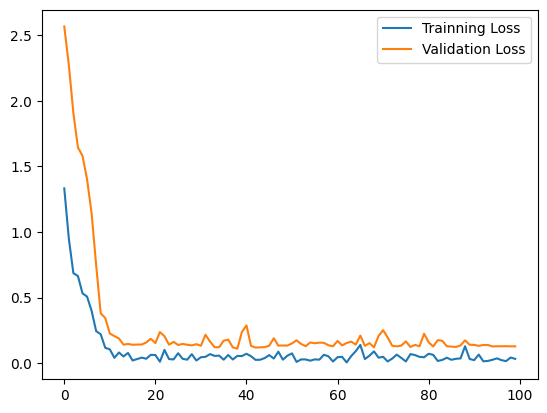

In [ ]:
plt.plot(history.history['loss'], label='Trainning Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
y_pred = model.predict(trainX[-n_future:])
y_pred_copied = np.repeat(y_pred, df.shape[1], axis=-1)
CO2_emission = scaler.inverse_transform(y_pred_copied)[:,0]
CO2_emission

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


array([0.36032033, 0.383752  , 0.4091991 , 0.43904048, 0.47427082,
       0.51443744, 0.5537431 , 0.57268703, 0.5741662 , 0.57106864,
       0.5660532 ], dtype=float32)

In [ ]:
# Calculate MSE
mse = mean_squared_error(df['CEM'][-11:], CO2_emission)
print(f"Mean Squared Error: {mse}")

mape = mean_absolute_percentage_error(df['CEM'][-11:], CO2_emission)
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 0.0006785754392093851
Mean Absolute Percentage Error: 0.03273398962245733


In [ ]:
# Calculate and print R-squared value
r_squared = r2_score(df['CEM'][-11:], CO2_emission)
print(f"R-squared (Accuracy) on Test Data: {r_squared * 100:.2f}%")

R-squared (Accuracy) on Test Data: 89.75%


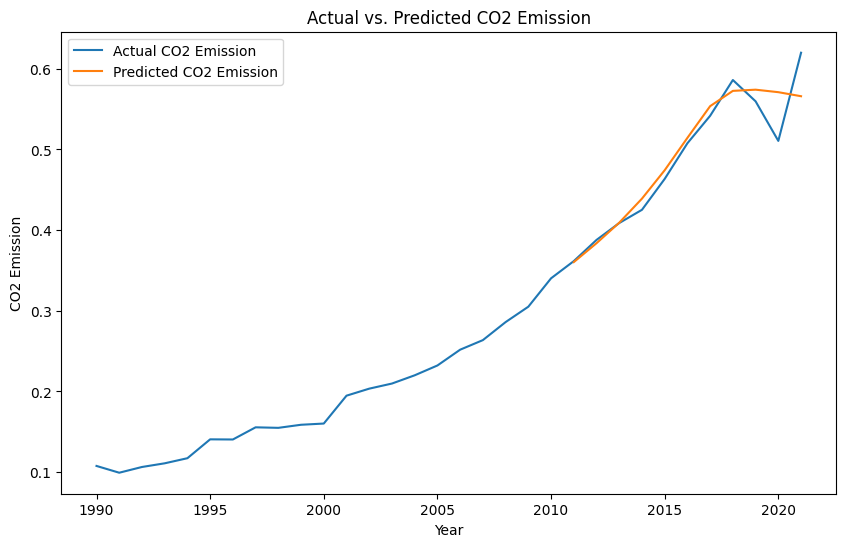

In [ ]:
Years = df_o['Year']

# Plotting the trend of CO2 emissions
plt.figure(figsize=(10, 6))
plt.plot(Years[0:32], df['CEM'] , label='Actual CO2 Emission')
plt.plot(Years[21:32], CO2_emission, label='Predicted CO2 Emission')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()
plt.title('Actual vs. Predicted CO2 Emission')
plt.show()

# **Another approch**

# **Final Prediction**

In [ ]:
df_o = pd.read_csv('/content/drive/MyDrive/GoogleColab/data.csv')
data_df = df_o

In [ ]:
df_o.tail()

,Year,CEM,EHP,GFC,LFC,MIC,OSE,RCP,SFC,TRP,FTA,FEC,GDP,GNI,MFG,GGE,PPL,REC,TRD,UPP
46,2036,NaN,96.436096,74.352249,22.403505,16.363920,9.094055,10.919236,6.003382,14.002560,18833.13281,90.022087,8.477510e+11,1.622670e+12,23.989126,7202.296875,204614352,27.931906,31.249926,53.715462
47,2037,NaN,111.118843,74.346542,22.403513,16.365223,9.110925,10.919230,6.003386,14.002557,18833.13281,91.089729,8.883570e+11,2.019810e+12,23.889898,7235.169922,207726864,27.932446,31.295317,55.268833
48,2038,NaN,135.643677,74.341934,22.403513,16.363785,9.124284,10.919226,6.003386,14.002556,18833.13281,92.214493,9.325390e+11,2.681580e+12,23.735689,7263.360352,211003088,27.933533,31.336668,56.960083
49,2039,NaN,179.736786,74.340767,22.403509,16.361273,9.135361,10.919223,6.003386,14.002556,18833.13281,93.403450,9.810170e+11,3.882870e+12,23.530048,7287.521973,214458736,27.934326,31.376154,58.832485
50,2040,NaN,262.319519,74.344177,22.403507,16.359262,9.144857,10.919221,6.003386,14.002554,18833.13281,94.664459,1.033270e+12,6.226670e+12,23.279898,7308.209473,218126560,27.934546,31.414970,60.904926


In [ ]:
data_df['CEM'] = pd.to_numeric(data_df['CEM'], errors='coerce')
data_df = data_df[cols].astype(float)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_df)

In [ ]:
# Prepare the training data
look_back = 14  # Window size for historical data

X_train, y_train = [], []

# Create a rolling window of 10 years to predict 'CEM' for each year from 2023 to 2040
for i in range(18):
    X_train.append(df_scaled[i:i+look_back])
    y_train.append(df_scaled[i+look_back, 0])  # Assuming 'CEM' is the first column

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshape the input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu',return_sequences=False ))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_split=0.1, verbose=2)

Epoch 1/100
6/6 - 5s - 913ms/step - loss: 0.7440 - val_loss: 2.0879
Epoch 2/100
6/6 - 0s - 21ms/step - loss: 0.5507 - val_loss: 1.0515
Epoch 3/100
6/6 - 0s - 21ms/step - loss: 0.2031 - val_loss: 0.2348
Epoch 4/100
6/6 - 0s - 23ms/step - loss: 0.1130 - val_loss: 0.3463
Epoch 5/100
6/6 - 0s - 18ms/step - loss: 0.1381 - val_loss: 0.1342
Epoch 6/100
6/6 - 0s - 22ms/step - loss: 0.0741 - val_loss: 0.1872
Epoch 7/100
6/6 - 0s - 18ms/step - loss: 0.0320 - val_loss: 0.1259
Epoch 8/100
6/6 - 0s - 18ms/step - loss: 0.1458 - val_loss: 0.1325
Epoch 9/100
6/6 - 0s - 22ms/step - loss: 0.1035 - val_loss: 0.7066
Epoch 10/100
6/6 - 0s - 21ms/step - loss: 0.0373 - val_loss: 0.1271
Epoch 11/100
6/6 - 0s - 20ms/step - loss: 0.0847 - val_loss: 0.1523
Epoch 12/100
6/6 - 0s - 22ms/step - loss: 0.0428 - val_loss: 0.1294
Epoch 13/100
6/6 - 0s - 18ms/step - loss: 0.0343 - val_loss: 0.2935
Epoch 14/100
6/6 - 0s - 18ms/step - loss: 0.1220 - val_loss: 0.1411
Epoch 15/100
6/6 - 0s - 18ms/step - loss: 0.0671 - val_l

In [ ]:
df_o['CEM'] = pd.to_numeric(df_o['CEM'], errors='coerce')
data = df_o[cols].astype(float)

In [ ]:
data = scaler.fit_transform(data)

In [ ]:
# Define the future years for which you want to predict 'CEM'
future_years = range(2019, 2041)  # Years from 2022 to 2040
look_back=14
# Predict 'CEM' values for the future years
future_values = []
inputs = data[17:31, :]  # Last 10 years of data

for year in future_years:
    input_data = np.reshape(inputs, (1, look_back, data.shape[1]))  # Reshape for prediction
    predicted_value = model.predict(input_data)[0, 0]  # Predict the 'CEM' value
    future_values.append(predicted_value)

    # Update the input data for the next year's prediction
    inputs = np.roll(inputs, shift=-1, axis=0)  # Roll one step forward for all columns
    inputs[-1, 0] = predicted_value  # Update the predicted 'CEM' value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# Getting learning Weights
lstm_weights = model.layers[0].get_weights()[0]

feature_names = df_o.columns[1:-1]

for i, features in enumerate(feature_names):
  weight = lstm_weights[0][i]
  print(f"Weights for {features}: {weight}")

Weights for CEM: 0.1461481750011444
Weights for EHP: -0.012289771810173988
Weights for GFC: 0.09167123585939407
Weights for LFC: 0.05255734547972679
Weights for MIC: -0.039581548422575
Weights for OSE: 0.1010114774107933
Weights for RCP: 0.0571531280875206
Weights for SFC: 0.10836239904165268
Weights for TRP: 0.16079919040203094
Weights for FTA: -0.07116060703992844
Weights for FEC: -0.14052139222621918
Weights for GDP: -0.09909584373235703
Weights for GNI: -0.05758649483323097
Weights for MFG: 0.1586637645959854
Weights for GGE: -0.02765699476003647
Weights for PPL: -0.07020258903503418
Weights for REC: 0.14077463746070862
Weights for TRD: 0.09638770669698715


In [ ]:
model.save("/content/drive/MyDrive/Carbon_Data/model.h5")

In [ ]:
# Final Value

future_values_array = np.array(future_values)
future_values_array= future_values_array.reshape(-1,1)
future_values_copied = np.repeat(future_values_array, data_df.shape[1], axis=-1)
# future_values_copied = np.repeat(future_values_array, data_df.shape[1], axis=-1)
CO2_emm_23_40 = scaler.inverse_transform(future_values_copied)[:,0]
CO2_emm_23_40

array([0.52956945, 0.510774  , 0.4966156 , 0.48456088, 0.47657624,
       0.47174522, 0.47469017, 0.48493072, 0.4967131 , 0.5244728 ,
       0.5430627 , 0.55340886, 0.5554053 , 0.55144215, 0.5434417 ,
       0.520904  , 0.5034066 , 0.48930606, 0.4800454 , 0.47421306,
       0.47648764, 0.48638672], dtype=float32)

In [ ]:
data_f = pd.DataFrame()
data_f['Year'] = df_o['Year'].copy()
data_f['CEM'] = df_o['CEM'].copy()

for i in range(29, 51):
  data_f['CEM'][i] = CO2_emm_23_40[i-29]

<ipython-input-44-b6bee4238bf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['CEM'][i] = CO2_emm_23_40[i-29]
<ipython-input-44-b6bee4238bf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['CEM'][i] = CO2_emm_23_40[i-29]
<ipython-input-44-b6bee4238bf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['CEM'][i] = CO2_emm_23_40[i-29]
<ipython-input-44-b6bee4238bf0>:6: SettingWithCopyWarning: 
A value is trying t

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset into a Pandas DataFrame


# Specify the number of Monte Carlo iterations
num_iterations = 1000

# Define a function to perform the Monte Carlo simulation
def monte_carlo_simulation(data, num_iterations):
    # Initialize an empty DataFrame to store simulation results
    simulation_results = pd.DataFrame(columns=data.columns[1:])

    # Loop through each iteration
    for i in range(num_iterations):
        # Create an empty DataFrame to store the simulated values
        simulated_values = pd.DataFrame(columns=data.columns[1:])

        # Loop through each column (excluding the 'Year' column)
        for col in data.columns[1:]:
            # Calculate the mean and standard deviation of the column
            mean = data[col].mean()
            std = data[col].std()

            # Generate random values from a normal distribution with the calculated mean and standard deviation
            simulated_values[col] = np.random.normal(mean, std, len(data))

        # Append the simulated values to the simulation results DataFrame
        simulation_results = pd.concat([simulation_results, simulated_values], ignore_index=True)

    return simulation_results

# Perform the Monte Carlo simulation
results = monte_carlo_simulation(data_f, num_iterations)

# Save the simulation results to a CSV
results.to_csv('monte_carlo_results.csv', index=False)


<ipython-input-45-dc67fc3d9b43>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_results = pd.concat([simulation_results, simulated_values], ignore_index=True)


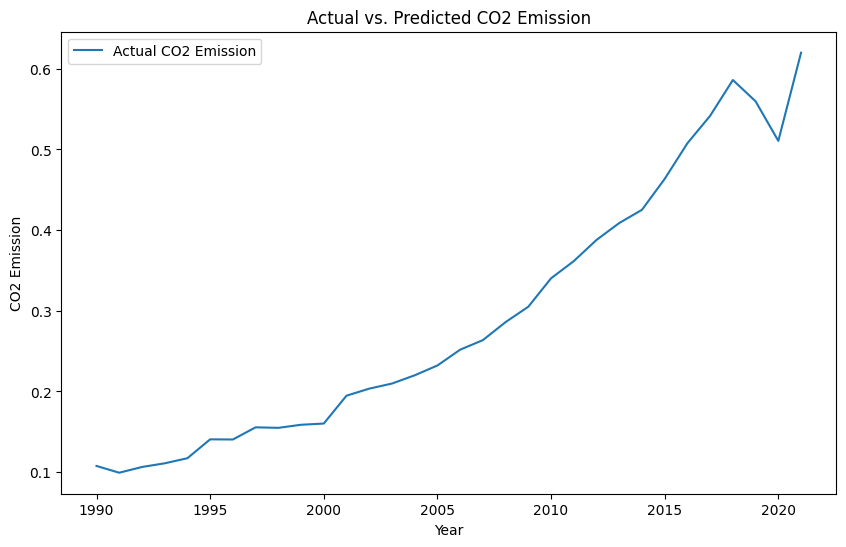

In [ ]:
Years = df_o['Year']

# Plotting the trend of CO2 emissions
plt.figure(figsize=(10, 6))
plt.plot(Years[0:32], df['CEM'] , label='Actual CO2 Emission')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()
plt.title('Actual vs. Predicted CO2 Emission')
plt.show()